In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pylab as plt
from eval import *
from load_data import *

In [2]:
outputs_openpose = "./Outputs/openpose/openpose_estimate.json"
outputs_alphapose = "./Outputs/alphapose/alphapose-results.json"
outputs_pose_tf = "./Outputs/pose-tensorflow/pose-tensorflow_results.json"
outputs_pifpaf = "./Outputs/pifpaf"
gt_path = "../../large_dataset/large_dataset.json"

In [3]:
gt = load_gt(gt_path)

In [4]:
#openpose_est, estimation_skeleton_format1 = load_openpose(outputs_openpose)

In [5]:
#alphapose_est, estimation_skeleton_format2 = load_alphapose(outputs_alphapose)

In [6]:
#get_image_groups_by_dist(aux1)

In [7]:
#evaluate_pcp( gt, openpose_est)

In [8]:
#evaluate_pcpm( gt, openpose_est)

In [9]:
#evaluate_pck( gt, openpose_est, threshold_type ='h')

In [10]:
#evaluate_eucl_dist( gt, openpose_est)

In [11]:
estimation_name = ['openpose', 'alphapose', 'pifpaf']
estimations = [load_openpose(outputs_openpose), load_alphapose(outputs_alphapose), load_pifpaf(outputs_pifpaf)] #pose-tf left out


In [12]:
pcp = []
pcpm = []
pck = []
pckh = []
eucl_dist = []
for i in range(len(estimations)):
    pcp.append(evaluate_pcp( gt, estimations[i][0],estimations[i][1]))
    pcpm.append(evaluate_pcpm( gt, estimations[i][0],estimations[i][1]))
    pck.append(evaluate_pck( gt, estimations[i][0],estimations[i][1]))
    pckh.append(evaluate_pck( gt, estimations[i][0],estimations[i][1],"h"))
    eucl_dist.append(evaluate_eucl_dist( gt, estimations[i][0],estimations[i][1]))

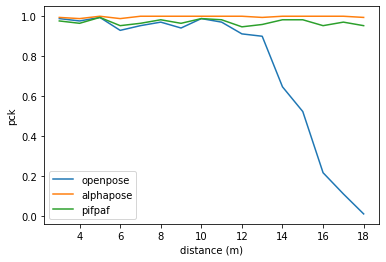

In [13]:
#pck plot

for n,data in enumerate(pck):
    lists = sorted(data.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(x, y)

plt.xlabel("distance (m)")
plt.ylabel("pck")
plt.legend(estimation_name)
plt.show()

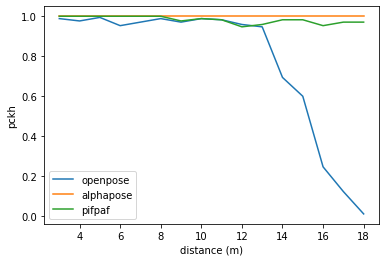

In [14]:
#pckh plot

for n,data in enumerate(pckh):
    lists = sorted(data.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(x, y)

plt.xlabel("distance (m)")
plt.ylabel("pckh")
plt.legend(estimation_name)
plt.show()

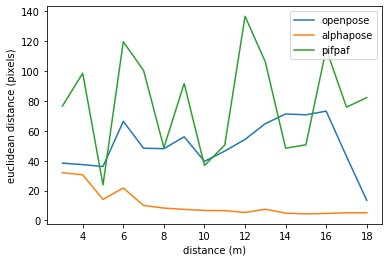

In [15]:
#euclidean distance plot

for n,data in enumerate(eucl_dist):
    lists = sorted(data.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(x, y)

plt.xlabel("distance (m)")
plt.ylabel("euclidean distance (pixels)")
plt.legend(estimation_name)
plt.show()